# Data Balancing security 

In [2]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import sys
from pandas import DataFrame, Series
from matplotlib.pyplot import figure, show

# Add the project directory to sys.path
project_dir = Path.cwd().parent  # Adjust as needed to point to your project root
sys.path.append(str(project_dir))

print("project_dir: ", project_dir)
# Import the module
from utils.pipeline import Pipeline
from utils.dslabs_functions import NR_STDEV, get_variable_types, determine_outlier_thresholds_for_var
from utils.dslabs_functions import plot_bar_chart

dataloader = Pipeline()


data, target = dataloader.get_security_classification_dataset_and_target()

project_dir:  /Users/matsalexander/Desktop/kdd-process/src


Minority class= 0 : 133
Majority class= 1 : 4897
Proportion: 0.03 : 1


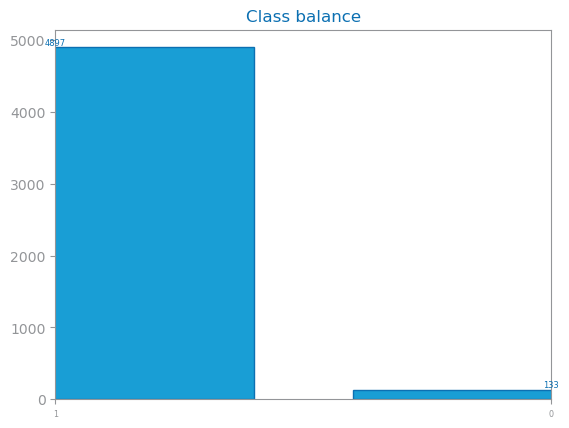

In [3]:
original: DataFrame = data.copy()

target_count: Series = original[target].value_counts()
positive_class = target_count.idxmin()
negative_class = target_count.idxmax()

print("Minority class=", positive_class, ":", target_count[positive_class])
print("Majority class=", negative_class, ":", target_count[negative_class])
print(
    "Proportion:",
    round(target_count[positive_class] / target_count[negative_class], 2),
    ": 1",
)
values: dict[str, list] = {
    "Original": [target_count[positive_class], target_count[negative_class]]
}

figure()
plot_bar_chart(
    target_count.index.to_list(), target_count.to_list(), title="Class balance"
)
show()

In [ ]:

df_positives: Series = original[original[target] == positive_class]
df_negatives: Series = original[original[target] == negative_class]

In [ ]:
from pandas import concat


df_neg_sample: DataFrame = DataFrame(df_negatives.sample(len(df_positives)))
df_under: DataFrame = concat([df_positives, df_neg_sample], axis=0)
# df_under.to_csv(f"data/{file}_under.csv", index=False)

print("Minority class=", positive_class, ":", len(df_positives))
print("Majority class=", negative_class, ":", len(df_neg_sample))
print("Proportion:", round(len(df_positives) / len(df_neg_sample), 2), ": 1")

Minority class= 0 : 133
Majority class= 1 : 133
Proportion: 1.0 : 1


In [6]:
df_pos_sample: DataFrame = DataFrame(
    df_positives.sample(len(df_negatives), replace=True)
)
df_over: DataFrame = concat([df_pos_sample, df_negatives], axis=0)
# df_over.to_csv(f"data/{file}_over.csv", index=False)

print("Minority class=", positive_class, ":", len(df_pos_sample))
print("Majority class=", negative_class, ":", len(df_negatives))
print("Proportion:", round(len(df_pos_sample) / len(df_negatives), 2), ": 1")

Minority class= 0 : 4897
Majority class= 1 : 4897
Proportion: 1.0 : 1


In [7]:
from numpy import ndarray
from pandas import Series
from imblearn.over_sampling import SMOTE

RANDOM_STATE = 42

smote: SMOTE = SMOTE(sampling_strategy="minority", random_state=RANDOM_STATE)
y = original.pop(target).values
X: ndarray = original.values
smote_X, smote_y = smote.fit_resample(X, y)
df_smote: DataFrame = concat([DataFrame(smote_X), DataFrame(smote_y)], axis=1)
df_smote.columns = list(original.columns) + [target]
# df_smote.to_csv(f"data/{file}_smote.csv", index=False)

smote_target_count: Series = Series(smote_y).value_counts()
print("Minority class=", positive_class, ":", smote_target_count[positive_class])
print("Majority class=", negative_class, ":", smote_target_count[negative_class])
print(
    "Proportion:",
    round(smote_target_count[positive_class] / smote_target_count[negative_class], 2),
    ": 1",
)
print(df_smote.shape)

Minority class= 0 : 4897
Majority class= 1 : 4897
Proportion: 1.0 : 1
(9794, 20)


## alternativly we can increase the data sample and the use the

In [15]:
from pandas import concat
size = 5000*5000/133/2
size = int(size)
print("size=", size)
data_extra, target = dataloader.get_security_classification_dataset_and_target(sample_size=size)

size= 93984


In [ ]:
positive_class = target_count.idxmin()
negative_class = target_count.idxmax()

df_positives: Series = data_extra[data_extra[target] == positive_class]
df_negatives: Series = data_extra[data_extra[target] == negative_class]

df_neg_sample: DataFrame = DataFrame(df_negatives.sample(len(df_positives)))
df_under: DataFrame = concat([df_positives, df_neg_sample], axis=0)
# df_under.to_csv(f"data/{file}_under.csv", index=False)

print("Minority class=", positive_class, ":", len(df_positives))
print("Majority class=", negative_class, ":", len(df_neg_sample))
print("Proportion:", round(len(df_positives) / len(df_neg_sample), 2), ": 1")
new_data = df_under.copy()

Minority class= 0 : 2438
Majority class= 1 : 2438
Proportion: 1.0 : 1


## concolusion
Severe class imbalance was observed. Due to large dataset size, negatives were undersampled to match positives. This balanced set should improve model fairness and performance.

### For latex
We observed class imbalance. For arrests data (large dataset), we first increased size, then undersampled negatives to match positives, ensuring balanced classes. For the smaller economic dataset, we applied the SMOTE oversampling method, generating synthetic positives to achieve similar class proportions. Both approaches enhance fairness and improve model training performance, ensuring robust, unbiased predictions and better generalization.